<a href="https://colab.research.google.com/github/binaria010/Control-for-Spacecraft-Attitude-Motion/blob/master/Segunda%20Parte/MinimosCuadrados/Clase%202V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion lineal generalizada (o minimos cuadrados con pesos)

Ahora vamos a resolver el problema de hacer ajustes mas generales. Es decir, para un conjunto de datos ajustar una funcion $f(x)$ no necesariamente lineal.

La idea es transformar la variable $y$ (la que uno desea predecir) con una funcion $h$ de tal forma que $z = h(y)$ tenga una relacion lineal con $x$ (la variable predictora). 

Por ejemplo si 

* $f(x) = ke^{bx}$ entonces tomamos $h(y) = \log(y)$ luego

$$
z = \log(y) =\log(f(x)) = \log(ke^{bx}) = \log(k) + bx
$$

y hacemos una regresion para los datos $(x, z)$


Similarmente si 

* $f(x) = \frac{1}{a + bx}$, entonces tomamos $h(y) = \frac{1}{y}$ luego

$$
z = \frac{1}{y} = \frac{1}{f(x)} = a + bx
$$

y hacemos una regresion para los datos $(x, z)$ que nos da la función $g(x) = a + bx$ de esta nos interesan el valor de los coeficientes $a,b$ porque son los que necesitamos para armar nuestra función de ajuste pedida $f(x) = \frac{1}{a + bx}$

Podria ser necesario aplicar transformaciones a la variable predictora, por ejemplo:

* $f(x) = ax^b$ entonces como $ax^b = e^{\log(a) + b\log(x)}$ tomamos como $h(y)= \log(y)$ y tomamos como variable predictora $t = \log(x)$ entonces tenemos la siguiente relacion lineal:

$$
z = \log(y) = \log(f(x)) = \log(a) = b\log(x) = \log(a) + bt
$$

y hacemos una regresion lineal a los datos $(t, z)$ que nos da la función $g(t) = a + bt$ de esta nos interesan el valor de los coeficientes $a,b$ porque son los que necesitamos para armar nuestra función de ajuste pedida $f(x) = ax^b$



En el caso que tenemos que transformar la variable $y$ mediante una funcion $h$ podemos hacer dos tipos de regresiones: una regresion comun y otra que sea con pesos $w_i = \frac{1}{h'(y_i)^2}$

## Ejercicio 1:

Dados los datos
<table>
   <tr> 
  <td>$x$  </td>
  <td>0.39</td>
  <td>0.69</td>
  <td>0.71</td>
  <td>0.55</td>
  <td>0.43</td>
  <td>0.45</td>
  <td>0.31</td>
  <td>0.58</td>
  <td>0.91</td>
  <td>0.14</td>
  </tr>
  <tr>
  <td> $y$ </td>
  <td>0.85</td>
  <td>0.56</td>
  <td>0.55</td>
  <td>0.51</td>
  <td>0.76</td>
  <td>0.72</td>
  <td>1.3</td>
  <td>0.67</td>
  <td>0.43</td>
  <td>2.04</td>    
  </tr>
  

</table>



Hacer un ajuste de la forma $f(x)= \frac{1}{a + bx}$

* Usando minimos cuadrados

* Usando minimos cuadrados con pesos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


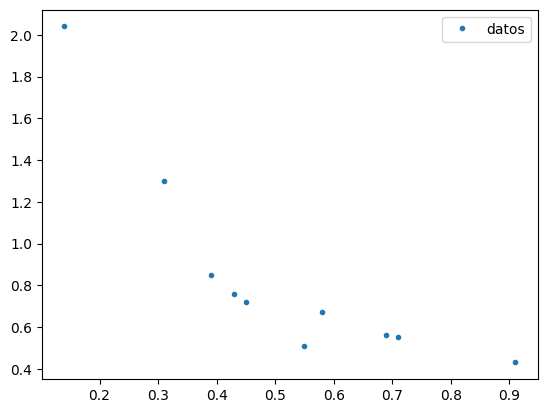

In [2]:
x = np.array([0.39, 0.69, 0.71, 0.55, 0.43, 0.45, 0.31, 0.58, 0.91, 0.14])
y = np.array([0.85, 0.56, 0.55, 0.51, 0.76, 0.72, 1.3, 0.67, 0.43, 2.04])

plt.plot(x, y, ".", label = "datos")
plt.legend()
plt.show()

In [3]:
def reglineal(x, y):

  """
  Esta funcion calcula los coeficientes de una regresion lineal simple. Devuelve la funcion a + bx 
  Inputs:
  x : numpy array dimension n
  y : numpy array dimension n

  Return:
  f : poly1D: objeto polinomio de python. f es un polinomio de grado 1: alpha* +beta*x
  """
  n = len(x)
  X = np.ones((n,2))

  X[:, 1] = x

  coefs =  np.linalg.solve(X.T @ X, np.dot(X.T, y))

  a = coefs[0]
  b = coefs[1]

  f = np.poly1d([b, a])

  return f


def reglinealPesos(x, y, w):

  """
  devuelve la recta de regresion lineal pero teniendo en cuenta los pesos w_i de cada obs
  """

  n = len(x)
  W = np.diag(w)
  X = np.ones((n,2))

  X[:, 1] = x

  coefs = np.linalg.solve(X.T @ W @ X, np.dot(X.T @ W, y))

  a = coefs[0]
  b = coefs[1]

  f = np.poly1d([b, a]) 

  return f

def error_regresion(f,x,y):
  '''
  PAra un ajuste f del consjunto de datos x,y esta funcion calcula el error en el ajuste osea S = sum_{i=1} ((y_i -f(x_i))^2)
  '''

  y_predicho = f(x)  # los y_1, ...y_n predicho por la funcion de ajuste f
  error = 0.5*np.sum((y_predicho - y)**2)

  return error


In [4]:
# reg lineal generalizada

# calculo z:
z = 1/y

g = reglineal(x, z)  # esta es la funcion lineal que relaciona z con x pero queremos la f

print("La funcion de ajuste lineal entre z, x es: \n", g)

 



La funcion de ajuste lineal entre z, x es: 
  
2.378 x + 0.2251


Hasta aca encontramos que $g(x) =a +bx= 0.2251 + 2.378x $ pero queremos la función de ajuste $f$ que relaciona $x$ con $y$. 

$$
f(x) =\frac{1}{a+bx} = \frac{1}{0.2251 +2.378x}
$$

es la funcion pedida.


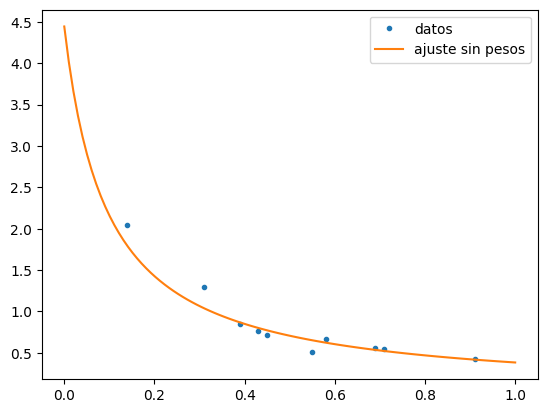

In [5]:
f = lambda x: 1/(0.2251 + 2.378*x)  # funcion que ajusta los datos (x_1,y_1),...,(x_n,y_n)


grilla = np.linspace(0,1, 100)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f(grilla), label = "ajuste sin pesos")
plt.legend()
plt.show()

Ahora hacemos un ajuste con pesos: es decir buscamos $a,b\in R$ de tal forma que la función 

$$
S(a,b) =\frac{1}{2}\sum_{i=1}^n w_i((y_i - f(x_i))^2)
$$

tome sus valor minimo. Con $f(x) = \frac{1}{a+bx}$ y los pesos $w_i$ se calculan como dijimos antes:

$$
w_i = \left(\frac{1}{h'(y_i)}\right)^2 
$$
siendo $h$ la funcion que transforma $y$ en $z$.

In [6]:

# Para calcular los pesos
derh = lambda y: -1/y**2
pesos = (1/derh(y))**2


g_pesos = reglinealPesos(x, z, pesos)   # (es z NO y...) g_pesos es la relacion lineal es entre x y z

print("La funcion de ajuste lineal entre x y z es :: \n", g_pesos)




La funcion de ajuste lineal entre x y z es :: 
  
2.359 x + 0.1517


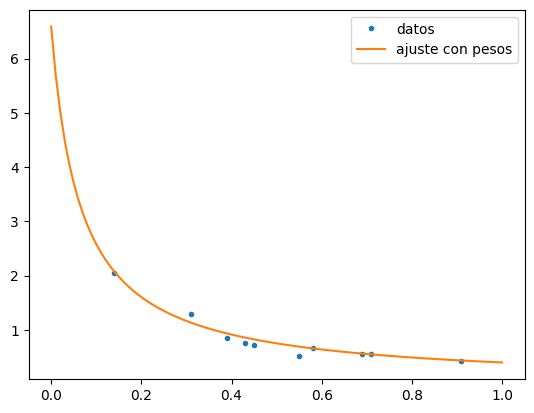

In [7]:
#la funcion de ajuste de x e y es:

f_pesos = lambda x: 1/(0.1517 + 2.359*x)



plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f_pesos(grilla), label = "ajuste con pesos")
plt.legend()
plt.show()

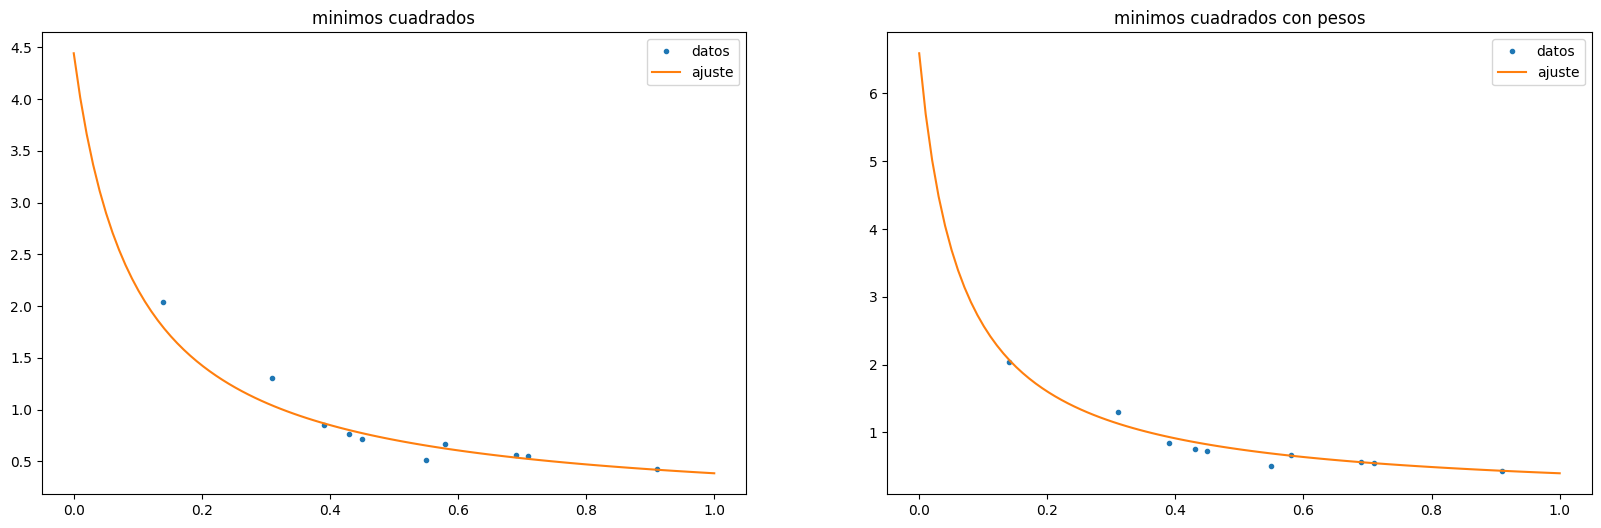

In [8]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f(grilla), label = "ajuste")
plt.title("minimos cuadrados")
plt.legend()

plt.subplot(122)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f_pesos(grilla), label = "ajuste")
plt.title("minimos cuadrados con pesos")
plt.legend()


plt.show()

In [9]:
error_sin_pesos = error_regresion(f, x, y)

print("El error del ajuste sin pesos es: ", error_sin_pesos)


error_regresion_generalizada = error_regresion(f_pesos, x, y)

print("\n\nEl error del ajuste con pesos es: ", error_regresion_generalizada)

El error del ajuste sin pesos es:  0.07906918230184257


El error del ajuste con pesos es:  0.04457995323532534


## Ejercicio:  Agregamos dificultad!

Hacer el ejercicio 10:

## Ejercicio 10:

En cierta especie animal se estudia la relacion entre el peso $X$ (en kgs) y el volumen pulmonar $Y$ (en litros), obteniendose los datos
<center>
	<table>
		<tr>
		<td> peso (kgs)  </td>  
    <td> 60 </td>  
    <td> 85 </td>  
    <td> 100 </td>  
    <td> 150 </td>  
    <td> 250 </td>
		</tr>
    <tr>
		<td> vol. pulmonar (l) </td>  
    <td> 2.3 </td>  
    <td> 4 </td>  
    <td> 5 </td>  
    <td> 9 </td>  
    <td> 19.5 </td>
		</tr>
	</table>
</center>

*  Ajustar los datos a una funcion $ Y = a X^b$ en el sentido de cuadrados minimos. Calcular el error cometido. 

*  Ajustar los datos a una funcion $ Y = a X^b$ en el sentido de cuadrados minimos generalizados. Calcular el error cometido y comparar. 

*  Graficar simultaneamente los datos de la tabla y las funciones obtenidas. 



Solucion:

Notar que:
$$
y = ax^b = e^{\log(a) + b\log(x)} 
$$

entonces aplicamos la transformacion $z = h(y)= \log(y)$ y queda que:

$$
z = \log(a) +b\log(x) = \log(a) + bt
$$

donde $t = \log(x)$. Entonces los coefs de la reg lineal que relacionan $t$ con $z$  son: $\alpha = \log(a)$, $\beta = b$ 



In [10]:
x = np.array([60, 85, 100, 150, 250])
y = np.array([2.3, 4, 5, 9, 19.5])

# transformo y en z: h(y) = log(y) =z
z = np.log(y)

# transformo x en t: t = log(x)
t = np.log(x)






In [11]:
# regresion lineal en variables (t,z) sin pesos:

g = reglineal(t, z)

print(g)

 
1.487 x - 5.242


de esta expresion de la funcion $g$ vemos que $\alpha = -5.242 =\log(a)$ y que $\beta = b = 1.487$ entonces la funcion $f$ de ajuste es: 

$$
f(x) = ax^b = e^{-5.242}x^{1.487}
$$

In [12]:
# la funcion de ajuste f  =  ax^b es:

f = lambda x: np.exp(-5.242+ (1.487)*np.log(x))    # tambien se puede definir asi: np.exp(g(np.log(x)))#

# error es:

error_sin_pesos = error_regresion(f,x,y)# error_regresion(f, x, y)

print("El error en la regresion sin pesos es: ", error_sin_pesos)

El error en la regresion sin pesos es:  0.010713823069637335


Como $h(y)=\log(y)$ entonces $h'(y)=1/y$, luego $w_i = \left(\frac{1}{h'(y_i)}\right)^2 = y_i^2$

In [13]:
# reg con pesos: h'(y)=1/y luego w_i = (1/h'(y_i))^2 = y_i^2

pesos = y**2

g_pesos = reglinealPesos(t, z, pesos)

print("La funcion lineal obtenida que relaciona t con z es:  ", g_pesos, "ojo que se debe entender como 1.49t -5.256")

La funcion lineal obtenida que relaciona t con z es:    
1.49 x - 5.256 ojo que se debe entender como 1.49t -5.256


In [14]:
f_pesos = lambda x: np.exp(-5.256 + 1.49*np.log(x))   # tambien se puede definir asi: np.exp(g_pesos(np.log(x)))#

# calcular el error

error_con_pesos =  error_regresion(f_pesos, x, y)
print("El error en la regresion con pesos es: ", error_con_pesos)

El error en la regresion con pesos es:  0.011177641555430405


In [15]:
# Hacer un plot de ambas regresiones junto con los datos 

## Seguimos con regresion no lineal 

Ejemplo:

Hallar una función de ajuste de la forma $f(x) =e^{a+bx^2}$ para los siguientes datos:

$$
\begin{array} {l c c c c c c c c c c c c c c c}
x & 0.84 &0.70 & 0.77 & 0.69 & 0.20 & 0.54 & 0.69 & 0.51 & 0.84 & 0.75 & 0.73 & 0.68 & 0.85 & 0.41 & 0.77\\
y & 1.09 & 1.68 & 1.37 & 1.73 & 4.14 & 2.50 & 1.73 & 2.66 & 1.09 & 1.45 & 1.54 & 1.78 & 1.06 & 3.20 & 1.37
\end{array}
$$

In [16]:
# cargamos los datos 
x = np.array([0.84, 0.70, 0.77, 0.69, 0.20, 0.54, 0.69, 0.51, 0.84, 0.75, 0.73, 0.68, 0.85, 0.41, 0.77])
y = np.array([0.75, 1.77, 1.02, 1.24, 4.53, 1.27, 1.00, 2.51, 0.57, 1.80, 2.10, 2.53, 0.90, 4.17, 1.17])


In [17]:
# regresion sin pesos:

# transformo y en z: h(y) =log(y)=z

z = np.log(y)

#transformo x en t: t = x^2:

t = x**2

# hago la regresion lineal de t vs z:
g = reglineal(t, z)

print(" la relacion lineal de t y z es: ", g)


 la relacion lineal de t y z es:   
-2.505 x + 1.606


In [18]:
f = lambda x: np.exp(1.606  -2.505*x**2)

error_sin_pesos = error_regresion(f, x, y)

print("El error en la regresion sin pesos es: ", error_sin_pesos)


El error en la regresion sin pesos es:  2.2645827060618617


In [19]:
# regresion con pesos:

# como h(y)= log(y), h'(y) = 1/y

pesos = y**2

g_pesos = reglinealPesos(t, z, pesos)

print(" la relacion lineal de t y z es: ", g_pesos)

 la relacion lineal de t y z es:   
-2.161 x + 1.648


In [20]:
f_pesos = lambda x: np.exp( 1.648 - 2.161*x**2)

error_con_pesos = error_regresion(f_pesos, x, y)

print("El error en la regresion con pesos es: ", error_con_pesos)


El error en la regresion con pesos es:  2.6675867901166774


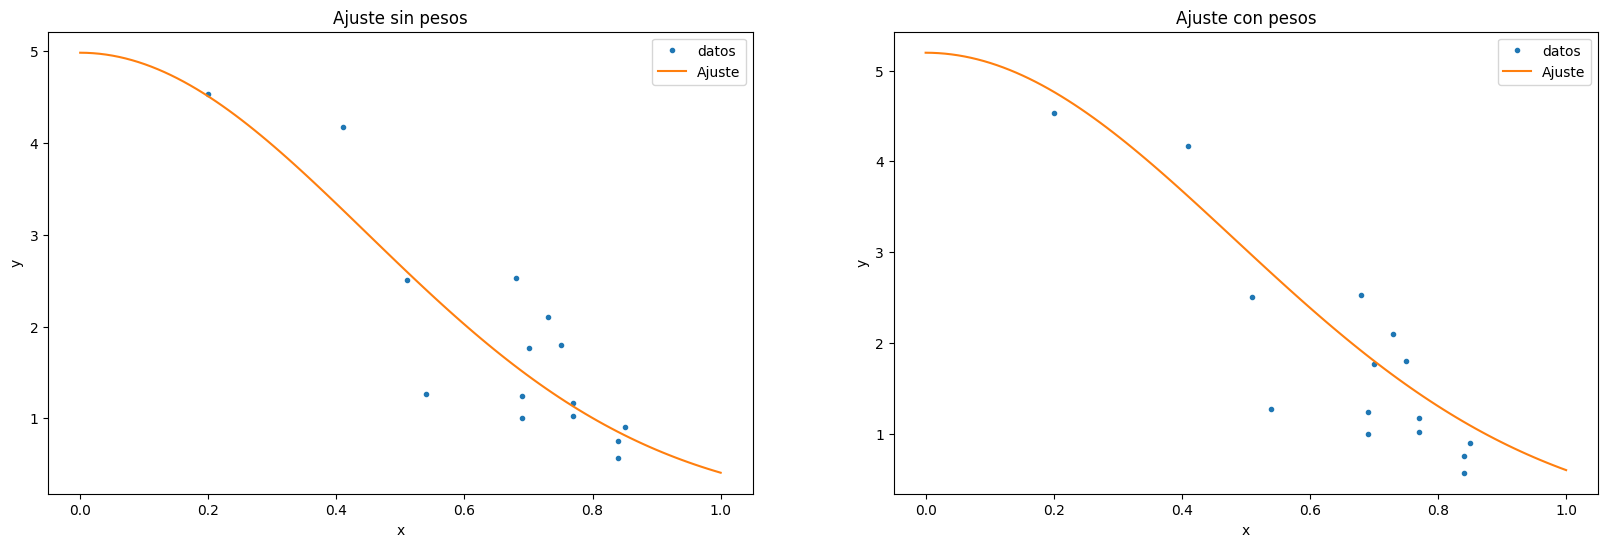

In [21]:
grilla = np.linspace(0, 1, 100)


plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f(grilla), label = "Ajuste")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste sin pesos")
plt.legend()

plt.subplot(122)
plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f_pesos(grilla), label = "Ajuste")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste con pesos")
plt.legend()


plt.show()


## Volvamos sobre el R2:

$$R^2 = \displaystyle\frac{\sum_{i=1}^n(\hat{y}_i - \bar{y})^2}{\sum_{j=1}^n(y_j - y_j)^2}$$

donde $\hat{y_i} = f(x_i)$ el la predicción de $y_i$ usando la función de ajuste $f$.

In [28]:
def R2(f, x,y):

  """
  Esta funcion calcula el r^2 de la regresion lineal dados los datos x, y
  """
  
  y_predicho = f(x)
  avg_y = np.mean(y)

  numerador = np.sum((y_predicho - y)**2)
  denominador = np.sum((y - avg_y)**2)

  return 1 - numerador/denominador

Calculemos el $R^2$ del problema anterior en ambos casos:


Para el ajuste $f$ obtenido sin pesos:

In [29]:
R2_f = R2(f, x, y)

print("El R2 para el ajuste sin pesos es: ", R2_f)

El R2 para el ajuste sin pesos es:  0.7616580674164866


Para el ajuste $f$ obtenido con pesos:

In [ ]:
R2_f_pesos = R2(f_pesos, x, y)

print("El R2 para el ajuste con pesos es: ", R2_f_pesos)

El R2 para el ajuste con pesos es:  0.8043824108465764
